In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 25.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import py7zr


archive =py7zr.SevenZipFile("/kaggle/input/cifar-10/train.7z",mode='r')
archive.extractall()
archive.close()

**Importing Dependencies**

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [5]:
filenames=os.listdir("/kaggle/working/train")

In [6]:
type(filenames)

list

In [7]:
len(filenames)

50000

In [8]:
print(filenames[0:5])
print(filenames[-5:])

['26622.png', '13381.png', '3248.png', '34762.png', '1748.png']
['22972.png', '36141.png', '1578.png', '25739.png', '752.png']


Labels Processing

In [9]:
labeled_df =pd.read_csv("/kaggle/input/cifar-10/trainLabels.csv")

In [10]:
labeled_df.shape

(50000, 2)

In [11]:
labeled_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [12]:
labeled_df[labeled_df['id']==7796]

,id,label
7795,7796,frog


In [13]:
labeled_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [14]:
labeled_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

***Manually Encoding***

In [15]:
labeled_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labeled_dictionary[i] for i in labeled_df['label']]

In [16]:
labels[0:5]
labels[-5:]

[2, 6, 9, 1, 1]

**Displaying Sample images**

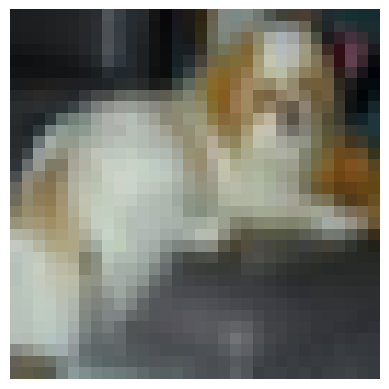

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/kaggle/working/train/7756.png')

# Check if the image is loaded correctly
if img is None:
    print("Image not found or the path is incorrect.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()


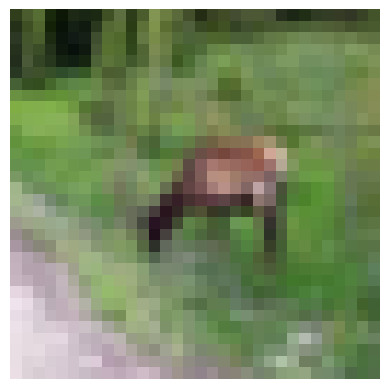

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/kaggle/working/train/7156.png')

# Check if the image is loaded correctly
if img is None:
    print("Image not found or the path is incorrect.")
else:
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()


In [19]:
id_list=list(labeled_df['id'])

In [20]:
id_list[-5:]

[49996, 49997, 49998, 49999, 50000]

**Image Processing**

**Converting Images Into Numpy Array**

In [21]:
train_data_folder='/kaggle/working/train/'
data=[]
for id in id_list:
    image =Image.open(train_data_folder+str(id)+'.png')
    image=np.array(image)
    data.append(image)

In [22]:
len(data)

50000

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(32, 32, 3)

In [25]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

**Covert image list and label list to numpy array**

In [26]:
X =np.array(data)
Y=np.array(labels)

In [27]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [28]:
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
X_train.shape

(40000, 32, 32, 3)

In [30]:
X_test.shape

(10000, 32, 32, 3)

**Scaling The Data**

In [31]:
x_train_scaled =X_train/255
x_test_scaled=X_test/255

In [32]:
x_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
EPOCHS=40

In [35]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
     

convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [36]:
model2 = models.Sequential()
model2.add(layers.UpSampling2D((2,2)))
model2.add(layers.UpSampling2D((2,2)))
model2.add(layers.UpSampling2D((2,2)))
model2.add(convolutional_base)
model2.add(layers.Flatten())
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(10, activation='softmax'))

In [37]:
from tensorflow.keras import optimizers

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(
    optimizer=optimizer, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    verbose=1, 
    min_lr=1e-6
)



In [39]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model2.fit(
    x_train_scaled, y_train,
    validation_split=0.1,
    epochs=40,
    batch_size=32,

)


Epoch 1/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 471s 365ms/step - accuracy: 0.4713 - loss: 1.6091 - val_accuracy: 0.8543 - val_loss: 0.5299
Epoch 2/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 416s 370ms/step - accuracy: 0.8190 - loss: 0.6789 - val_accuracy: 0.9110 - val_loss: 0.3263
Epoch 3/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 415s 369ms/step - accuracy: 0.8852 - loss: 0.4648 - val_accuracy: 0.9032 - val_loss: 0.3375
Epoch 4/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 414s 368ms/step - accuracy: 0.9095 - loss: 0.3714 - val_accuracy: 0.8785 - val_loss: 0.3968
Epoch 5/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 415s 369ms/step - accuracy: 0.9223 - loss: 0.3100 - val_accuracy: 0.9122 - val_loss: 0.2811
Epoch 6/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 414s 368ms/step - accuracy: 0.9365 - loss: 0.2618 - val_accuracy: 0.8938 - val_loss: 0.3562
Epoch 7/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 415s 369ms/step - accuracy: 0.9419 - loss: 0.2365 - val_accuracy: 0.9168 - val_loss: 0.2780
Epoch 8/40
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 415s 369ms/step - ac

In [40]:
test_loss, test_acc = model2.evaluate(x_test_scaled, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - accuracy: 0.8982 - loss: 0.5261
Test Accuracy: 0.8981999754905701


In [41]:
model2.save('/kaggle/working/Resnet_model.h5')

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [44]:
EPOCHS=40

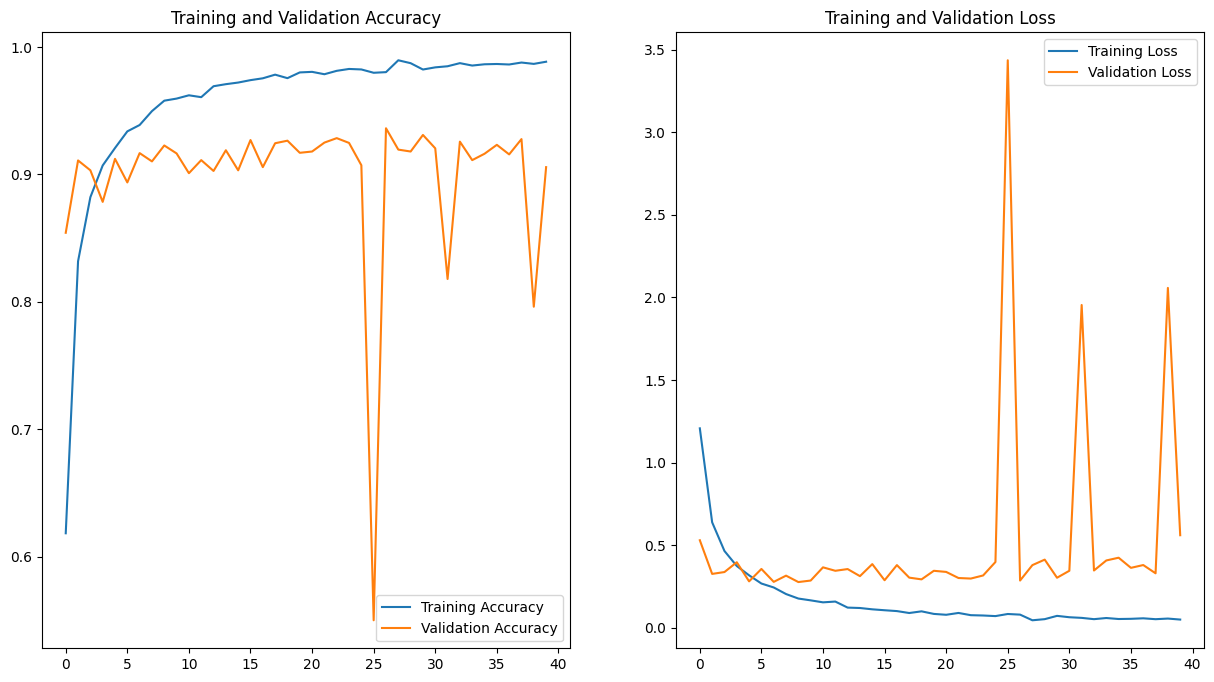

In [45]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
y_pred = model2.predict(x_test_scaled)
predicted_categories = tf.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step


In [47]:
Y_true = y_test 

In [48]:
predicted_categories

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([2, 1, 4, ..., 9, 5, 8])>

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [50]:
class_name = list(labeled_dictionary.keys())

In [51]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

    airplane       0.93      0.88      0.91      1029
  automobile       0.96      0.90      0.92       996
        bird       0.94      0.87      0.90      1031
         cat       0.83      0.85      0.84       982
        deer       0.90      0.94      0.92      1008
         dog       0.91      0.81      0.86       998
        frog       0.93      0.94      0.93       994
       horse       0.94      0.91      0.93       998
        ship       0.77      0.97      0.86       989
       truck       0.92      0.91      0.92       975

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



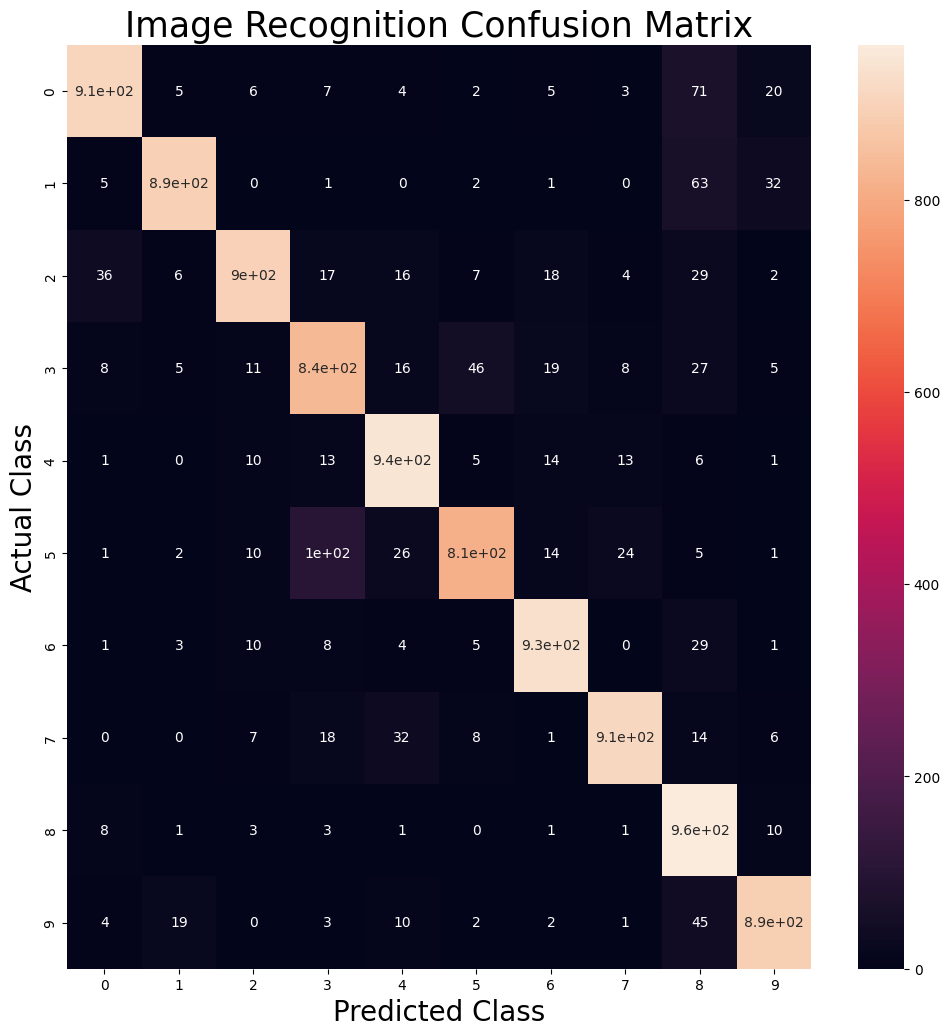

In [52]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Image Recognition Confusion Matrix',fontsize = 25)
plt.show()